In [5]:
# Import Packages
import numpy as np
import scipy.stats as stats
import os
import pickle
import scipy.io as scio
from ncdump_python3 import ncdump
import pickle
import Area_Avg
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import griddata
from netCDF4 import Dataset
from ncdump_python3 import ncdump
mpl.rc('font',size=22)
mpl.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
mpl.rc('text', usetex=True)
plt.rcParams['axes.xmargin'] = 0 #default margin spacing for the edges
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [6]:
#Load in Dimensions
LLL = Dataset('LatLon.nc')
WACCM4_Lat = np.squeeze(LLL.variables['lat'])
WACCM4_Lon = np.squeeze(LLL.variables['lon'])
LLL.close()

In [7]:
RCP45_forc_FLNT_2060 = np.zeros([12,96,144])
RCP45_forc_FSNT_2060 = np.zeros([12,96,144])

RCP45_forc_FLNT_2006 = np.zeros([12,96,144])
RCP45_forc_FSNT_2006 = np.zeros([12,96,144])
Months = ['01','02','03','04','05','06','07','08','09','10','11','12']
for i in range(12):
    RCP45_forc_FLNT_2060[i,:,:] = np.squeeze(\
    Dataset('Port/y2060_RCP45/b2060.wcm.port.rcp45.pert.001.'\
            +Months[i]+'.RAD.tave.nc').variables['FLNR'])
    
    RCP45_forc_FSNT_2060[i,:,:] = np.squeeze(\
    Dataset('Port/y2060_RCP45/b2060.wcm.port.rcp45.pert.001.'\
            +Months[i]+'.RAD.tave.nc').variables['FSNR'])
    
    RCP45_forc_FLNT_2006[i,:,:] = np.squeeze(\
    Dataset('Port/y2006_RCP45/b2006.wcm.port.rcp45.baseline.001.'\
            +Months[i]+'.RAD.tave.nc').variables['FLNR'])
    
    RCP45_forc_FSNT_2006[i,:,:] = np.squeeze(\
    Dataset('Port/y2006_RCP45/b2006.wcm.port.rcp45.baseline.001.'\
            +Months[i]+'.RAD.tave.nc').variables['FSNR'])
    
RCP45_forc_FLNT_2060 = np.ma.masked_invalid(RCP45_forc_FLNT_2060)
RCP45_forc_FSNT_2060 = np.ma.masked_invalid(RCP45_forc_FSNT_2060)
RCP45_forc_FLNT_2006 = np.ma.masked_invalid(RCP45_forc_FLNT_2006)
RCP45_forc_FSNT_2006 = np.ma.masked_invalid(RCP45_forc_FSNT_2006)

RCP45_LW_forcing = -(RCP45_forc_FLNT_2060-RCP45_forc_FLNT_2006)
RCP45_LW_forcing_ZM = np.mean(RCP45_LW_forcing, axis=(0,2))

RCP45_SW_forcing = RCP45_forc_FSNT_2060-RCP45_forc_FSNT_2006
RCP45_SW_forcing_ZM = np.mean(RCP45_SW_forcing, axis=(0,2))

RCP45_Net_forcing = RCP45_LW_forcing+RCP45_SW_forcing
RCP45_Net_forcing_ZM = np.mean(RCP45_Net_forcing, axis=(0,2))
RCP45_Net_forcing_ZM = np.ma.masked_invalid(RCP45_Net_forcing_ZM)

In [8]:
WAVD_forc_FLNT_2060 = np.zeros([12,96,144])
WAVD_forc_FSNT_2060 = np.zeros([12,96,144])

WAVD_forc_FLNT_2006 = np.zeros([12,96,144])
WAVD_forc_FSNT_2006 = np.zeros([12,96,144])
Months = ['01','02','03','04','05','06','07','08','09','10','11','12']
for i in range(12):
    WAVD_forc_FLNT_2060[i,:,:] = np.squeeze(\
    Dataset('Port/y2060_RCP45_WAVD/b2060.wcm.port.rcp45.WAVD.pert.001.'\
            +Months[i]+'.RAD.tave.nc').variables['FLNR'])
    
    WAVD_forc_FSNT_2060[i,:,:] = np.squeeze(\
    Dataset('Port/y2060_RCP45_WAVD/b2060.wcm.port.rcp45.WAVD.pert.001.'\
            +Months[i]+'.RAD.tave.nc').variables['FSNR'])
    
    WAVD_forc_FLNT_2006[i,:,:] = np.squeeze(\
    Dataset('Port/y2006_RCP45_WAVD/b2006.wcm.port.rcp45.WAVD.baseline.001.'\
            +Months[i]+'.RAD.tave.nc').variables['FLNR'])
    
    WAVD_forc_FSNT_2006[i,:,:] = np.squeeze(\
    Dataset('Port/y2006_RCP45_WAVD/b2006.wcm.port.rcp45.WAVD.baseline.001.'\
            +Months[i]+'.RAD.tave.nc').variables['FSNR'])
    
WAVD_forc_FLNT_2060 = np.ma.masked_invalid(WAVD_forc_FLNT_2060)
WAVD_forc_FSNT_2060 = np.ma.masked_invalid(WAVD_forc_FSNT_2060)
WAVD_forc_FLNT_2006 = np.ma.masked_invalid(WAVD_forc_FLNT_2006)
WAVD_forc_FSNT_2006 = np.ma.masked_invalid(WAVD_forc_FSNT_2006)

WAVD_LW_forcing = -(WAVD_forc_FLNT_2060-WAVD_forc_FLNT_2006)
WAVD_LW_forcing_ZM = np.mean(WAVD_LW_forcing, axis=(0,2))

WAVD_SW_forcing = WAVD_forc_FSNT_2060-WAVD_forc_FSNT_2006
WAVD_SW_forcing_ZM = np.mean(WAVD_SW_forcing, axis=(0,2))

WAVD_Net_forcing = WAVD_LW_forcing+WAVD_SW_forcing
WAVD_Net_forcing_ZM = np.mean(WAVD_Net_forcing, axis=(0,2))
WAVD_Net_forcing_ZM = np.ma.masked_invalid(WAVD_Net_forcing_ZM)

In [9]:
WAVD_Net_forcing_GA = Area_Avg.LatLonavg_Time(\
                        WAVD_Net_forcing,WACCM4_Lat,WACCM4_Lon)
RCP45_Net_forcing_GA = Area_Avg.LatLonavg_Time(\
                        RCP45_Net_forcing,WACCM4_Lat,WACCM4_Lon)

WAVD_Net_forcing_AA = Area_Avg.LatLonavg_Time(\
                        WAVD_Net_forcing[:,80:,:],WACCM4_Lat[80:],WACCM4_Lon)
RCP45_Net_forcing_AA = Area_Avg.LatLonavg_Time(\
                        RCP45_Net_forcing[:,80:,:],WACCM4_Lat[80:],WACCM4_Lon)

In [10]:
WAVD_LW_forcing_GA = Area_Avg.LatLonavg_Time(\
                        WAVD_LW_forcing,WACCM4_Lat,WACCM4_Lon)
RCP45_LW_forcing_GA = Area_Avg.LatLonavg_Time(\
                        RCP45_LW_forcing,WACCM4_Lat,WACCM4_Lon)

WAVD_LW_forcing_AA = Area_Avg.LatLonavg_Time(\
                        WAVD_LW_forcing[:,80:,:],WACCM4_Lat[80:],WACCM4_Lon)
RCP45_LW_forcing_AA = Area_Avg.LatLonavg_Time(\
                        RCP45_LW_forcing[:,80:,:],WACCM4_Lat[80:],WACCM4_Lon)

In [11]:
WAVD_SW_forcing_GA = Area_Avg.LatLonavg_Time(\
                        WAVD_SW_forcing,WACCM4_Lat,WACCM4_Lon)
RCP45_SW_forcing_GA = Area_Avg.LatLonavg_Time(\
                        RCP45_SW_forcing,WACCM4_Lat,WACCM4_Lon)

WAVD_SW_forcing_AA = Area_Avg.LatLonavg_Time(\
                        WAVD_SW_forcing[:,80:,:],WACCM4_Lat[80:],WACCM4_Lon)
RCP45_SW_forcing_AA = Area_Avg.LatLonavg_Time(\
                        RCP45_SW_forcing[:,80:,:],WACCM4_Lat[80:],WACCM4_Lon)

In [12]:
print('NET WAVD Arctic RF :',np.mean(WAVD_Net_forcing_AA))
print('LW WAVD Arctic RF :',np.mean(WAVD_LW_forcing_AA))
print('SW WAVD Arctic RF :',np.mean(WAVD_SW_forcing_AA))
print('\n')
print('NET RCP45 Arctic RF :',np.mean(RCP45_Net_forcing_AA))
print('LW RCP45 Arctic RF :',np.mean(RCP45_LW_forcing_AA))
print('SW RCP45 Arctic RF :',np.mean(RCP45_SW_forcing_AA))

NET WAVD Arctic RF : -0.1987851239265768
LW WAVD Arctic RF : -0.4891598554436518
SW WAVD Arctic RF : 0.29229199612759144


NET RCP45 Arctic RF : 1.2300481203811635
LW RCP45 Arctic RF : 1.3434941403639902
SW RCP45 Arctic RF : -0.11115800396339857


In [13]:
RCP45_dST = pickle.load(open(\
   "Future Projection CC Responses/RCP45_dST.pickle","rb"),encoding='latin1')

wAVD_dST = pickle.load(open(\
   "Future Projection CC Responses/wAVD_dST.pickle","rb"),encoding='latin1')

In [14]:
RCP45_dST_GA = np.zeros([5])
wAVD_dST_GA = np.zeros([5])
for i in range(5):
    RCP45_dST_GA[i] = np.mean(Area_Avg.LatLonavg_Time(\
    RCP45_dST[i,:,:,:],WACCM4_Lat,WACCM4_Lon),axis=0)
    
    wAVD_dST_GA[i] = np.mean(Area_Avg.LatLonavg_Time(\
    wAVD_dST[i,:,:,:],WACCM4_Lat,WACCM4_Lon),axis=0)

In [15]:
RCP45_dST_AA = np.zeros([5])
wAVD_dST_AA = np.zeros([5])
for i in range(5):
    RCP45_dST_AA[i] = np.mean(Area_Avg.LatLonavg_Time(\
    RCP45_dST[i,:,80:,:],WACCM4_Lat[80:],WACCM4_Lon),axis=0)
    
    wAVD_dST_AA[i] = np.mean(Area_Avg.LatLonavg_Time(\
    wAVD_dST[i,:,80:,:],WACCM4_Lat[80:],WACCM4_Lon),axis=0)

In [16]:
RCP45_dST_ZAM = np.mean(RCP45_dST,axis=(1,3))
wAVD_dST_ZAM = np.mean(wAVD_dST,axis=(1,3))

In [17]:
RCP45_dST_Warm_Ratio = np.zeros([5,96])
wAVD_dST_Warm_Ratio = np.zeros([5,96])
for i in range(96):
    RCP45_dST_Warm_Ratio[:,i] = RCP45_dST_ZAM[:,i]/RCP45_dST_GA
    wAVD_dST_Warm_Ratio[:,i] = wAVD_dST_ZAM[:,i]/wAVD_dST_GA

In [22]:
RCP45_dST_Warm_Ratio_file = open('RCP45_ArcAmp_Ratio_Zonal.pickle','wb')
pickle.dump(RCP45_dST_Warm_Ratio,RCP45_dST_Warm_Ratio_file)
RCP45_dST_Warm_Ratio_file.close()

wAVD_dST_Warm_Ratio_file = open('wAVD_ArcAmp_Ratio_Zonal.pickle','wb')
pickle.dump(wAVD_dST_Warm_Ratio,wAVD_dST_Warm_Ratio_file)
wAVD_dST_Warm_Ratio_file.close()

In [23]:
WAVD_LW_forcing_ZM_file = open('wAVD_RF_LW_Zonal.pickle','wb')
pickle.dump(WAVD_LW_forcing_ZM,WAVD_LW_forcing_ZM_file)
WAVD_LW_forcing_ZM_file.close()

WAVD_SW_forcing_ZM_file = open('wAVD_RF_SW_Zonal.pickle','wb')
pickle.dump(WAVD_SW_forcing_ZM,WAVD_SW_forcing_ZM_file)
WAVD_SW_forcing_ZM_file.close()

RCP45_LW_forcing_ZM_file = open('RCP45_RF_LW_Zonal.pickle','wb')
pickle.dump(RCP45_LW_forcing_ZM,RCP45_LW_forcing_ZM_file)
RCP45_LW_forcing_ZM_file.close()

RCP45_SW_forcing_ZM_file = open('RCP45_RF_SW_Zonal.pickle','wb')
pickle.dump(RCP45_SW_forcing_ZM,RCP45_SW_forcing_ZM_file)
RCP45_SW_forcing_ZM_file.close()

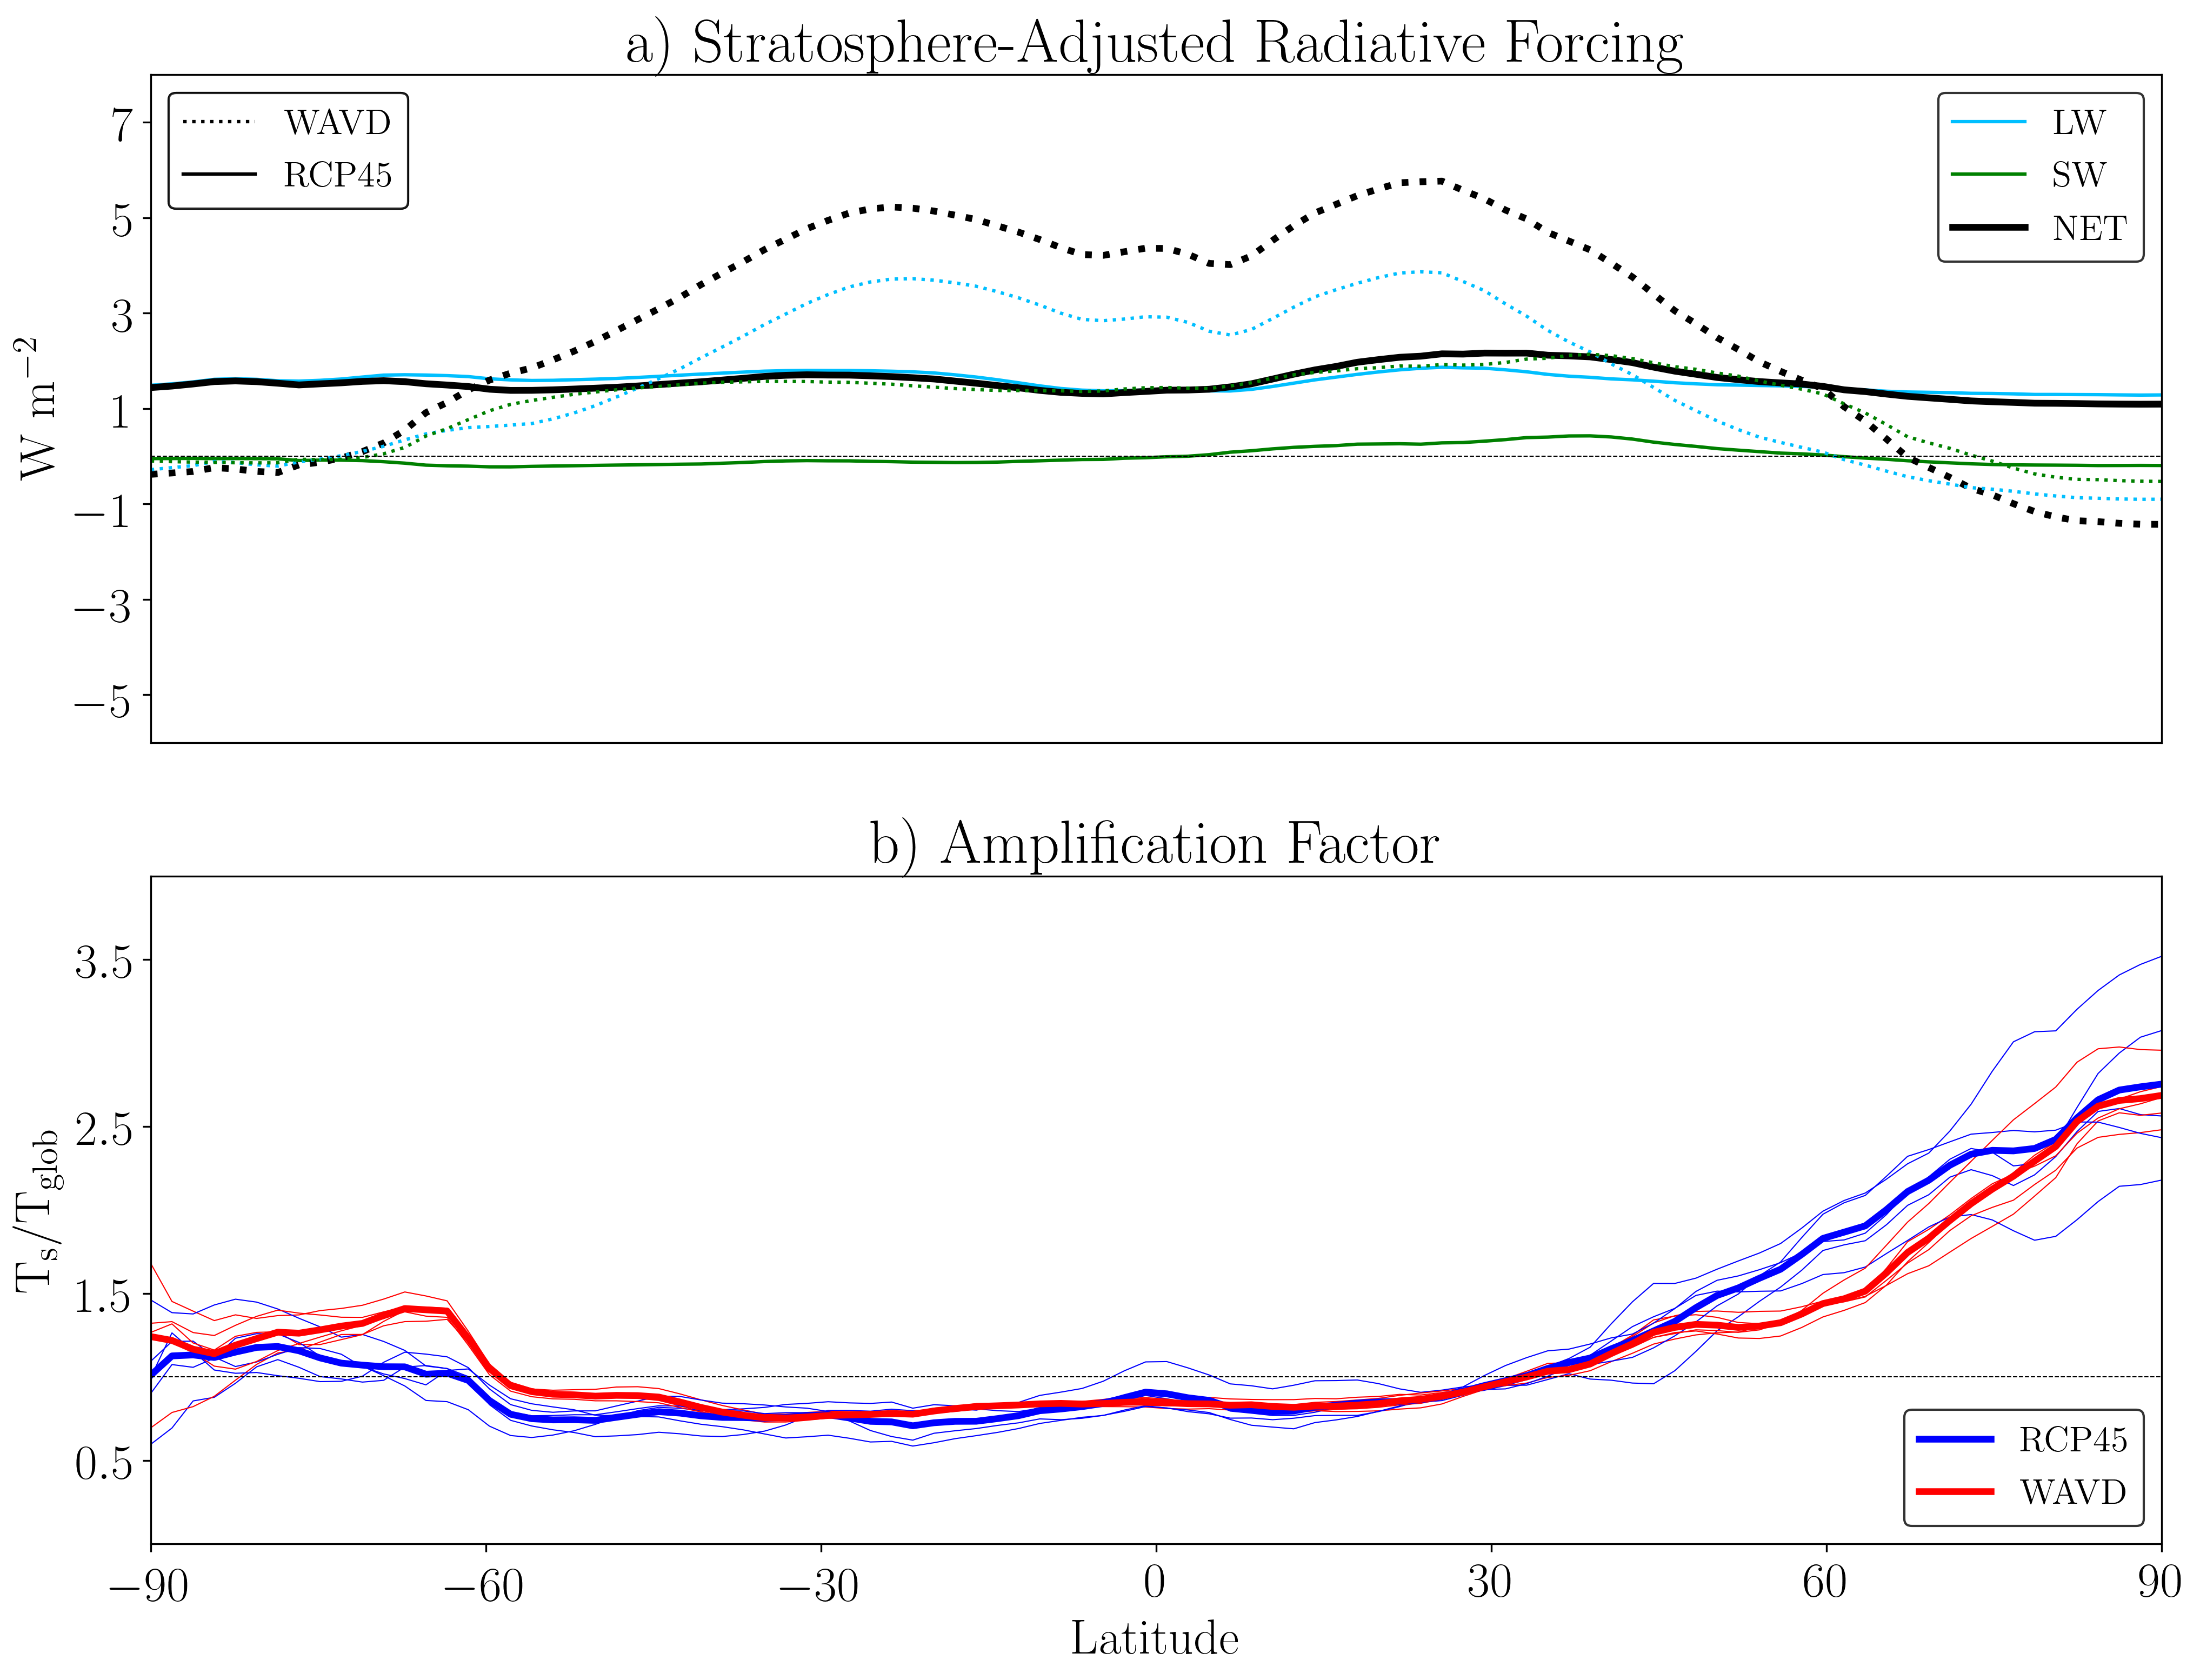

In [20]:
fig = plt.figure(figsize=(16,12),dpi=300)

plt.subplot(2,1,1)
plt.title('a) Stratosphere-Adjusted Radiative Forcing',fontsize=27)
A = plt.plot(WACCM4_Lat,RCP45_LW_forcing_ZM,label='LW',color='deepskyblue')
B = plt.plot(WACCM4_Lat,RCP45_SW_forcing_ZM,label='SW',color='green')
C = plt.plot(WACCM4_Lat,RCP45_Net_forcing_ZM,label='NET',color='k',linewidth=3)
D = plt.plot(WACCM4_Lat,WAVD_Net_forcing_ZM,color='k',linestyle=':',linewidth=3)
E = plt.plot(WACCM4_Lat,WAVD_LW_forcing_ZM,color='deepskyblue',linestyle=':')
F = plt.plot(WACCM4_Lat,WAVD_SW_forcing_ZM,color='green',linestyle=':')

G = plt.plot(np.nan,label='WAVD',linestyle=':',color='k')
H = plt.plot(np.nan,label='RCP45',linestyle='-',color='k')

plt.ylim(-6,8)
plt.yticks(range(-5,8,2))
first_legend = plt.legend(handles=[A[0],B[0],C[0]],loc='upper right',fontsize=16)
first_legend.get_frame().set_edgecolor('k')
ax = plt.gca().add_artist(first_legend)

second_legend = plt.legend(handles=[G[0],H[0]],loc='upper left',fontsize=16)
second_legend.get_frame().set_edgecolor('k')
ax2 = plt.gca().add_artist(second_legend)

plt.axhline(0,color='k',linestyle='--',linewidth=0.5)
plt.ylabel("W m$^{-2}$")
plt.xticks([])

plt.subplot(2,1,2)
plt.title('b) Amplification Factor',fontsize=27)
for i in range(5):
    plt.plot(WACCM4_Lat,RCP45_dST_Warm_Ratio[i,:],color='blue',linewidth=0.5)
    plt.plot(WACCM4_Lat,wAVD_dST_Warm_Ratio[i,:],color='red',linewidth=0.5)
plt.plot(WACCM4_Lat,np.mean(RCP45_dST_Warm_Ratio,axis=0),\
         color='blue',linewidth=3,label='RCP45')
plt.plot(WACCM4_Lat,np.mean(wAVD_dST_Warm_Ratio,axis=0),\
         color='red',linewidth=3,label='WAVD')
#plt.text(-89,3.6,'b)')
plt.axhline(1,color='k',linestyle='--',linewidth=0.5)
plt.legend(fontsize=16,loc='lower right').get_frame().set_edgecolor('k')
plt.ylim(0,4)
plt.yticks(np.arange(0.5,3.6,1))
plt.ylabel("T$_{\mathrm{s}}$/T$_{\mathrm{glob}}$")
plt.xlabel("Latitude")
plt.xticks(range(-90,91,30));
#plt.grid()

#plt.savefig('ZM_RF_Trop.eps',bbox_inches='tight')

In [ ]:
WAVD_Net_feedback_GA = np.mean(WAVD_Net_forcing_GA)/np.mean(wAVD_dST_GA)
WAVD_Net_feedback_AA = np.mean(WAVD_Net_forcing_AA)/np.mean(wAVD_dST_AA)

In [ ]:
RCP45_Net_feedback_GA = np.mean(RCP45_Net_forcing_GA)/np.mean(RCP45_dST_GA)
RCP45_Net_feedback_AA = np.mean(RCP45_Net_forcing_AA)/np.mean(RCP45_dST_AA)

wAVD_RF_EnergyB_GA_file = open('wAVD_RF_EnergyB_GA.pickle','wb')
pickle.dump(np.mean(WAVD_Net_forcing_GA),wAVD_RF_EnergyB_GA_file)
wAVD_RF_EnergyB_GA_file.close()
wAVD_RF_EnergyB_AA_file = open('wAVD_RF_EnergyB_AA.pickle','wb')
pickle.dump(np.mean(WAVD_Net_forcing_AA),wAVD_RF_EnergyB_AA_file)
wAVD_RF_EnergyB_AA_file.close()

RCP45_RF_EnergyB_GA_file = open('RCP45_RF_EnergyB_GA.pickle','wb')
pickle.dump(np.mean(RCP45_Net_forcing_GA),RCP45_RF_EnergyB_GA_file)
RCP45_RF_EnergyB_GA_file.close()
RCP45_RF_EnergyB_AA_file = open('RCP45_RF_EnergyB_AA.pickle','wb')
pickle.dump(np.mean(RCP45_Net_forcing_AA),RCP45_RF_EnergyB_AA_file)
RCP45_RF_EnergyB_AA_file.close()

wAVD_RF_Feedback_GA_file = open('wAVD_RF_Feedback_GA.pickle','wb')
pickle.dump(np.mean(WAVD_Net_feedback_GA),wAVD_RF_Feedback_GA_file)
wAVD_RF_Feedback_GA_file.close()
wAVD_RF_Feedback_AA_file = open('wAVD_RF_Feedback_AA.pickle','wb')
pickle.dump(np.mean(WAVD_Net_feedback_AA),wAVD_RF_Feedback_AA_file)
wAVD_RF_Feedback_AA_file.close()

RCP45_RF_Feedback_GA_file = open('RCP45_RF_Feedback_GA.pickle','wb')
pickle.dump(np.mean(RCP45_Net_feedback_GA),RCP45_RF_Feedback_GA_file)
RCP45_RF_Feedback_GA_file.close()
RCP45_RF_Feedback_AA_file = open('RCP45_RF_Feedback_AA.pickle','wb')
pickle.dump(np.mean(RCP45_Net_feedback_AA),RCP45_RF_Feedback_AA_file)
RCP45_RF_Feedback_AA_file.close()

In [4]:
np.mean(WAVD_Net_feedback_GA)

NameError: name 'WAVD_Net_feedback_GA' is not defined